# Examples
##### Some usage examples and ways to make the figure better than what default options yield.

First import stuff

In [1]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### A very simple example also shown in the wiki to simply introduce the call signature of `adjust_text`

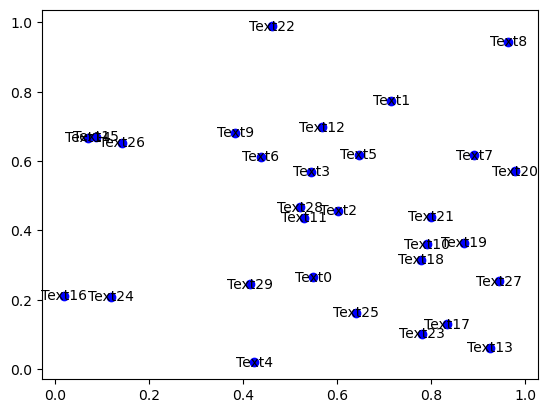

In [2]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]

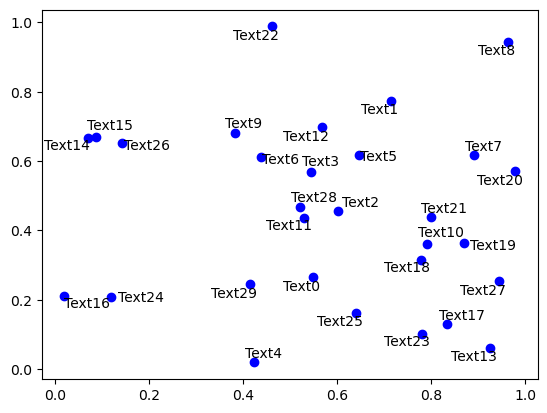

In [3]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]
adjust_text(texts)

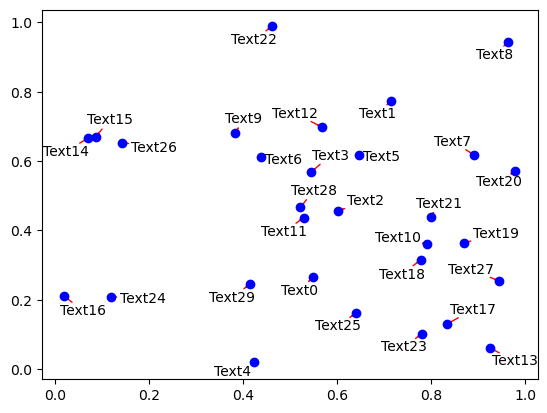

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, 'bo')
texts = [ax.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]
adjust_text(texts, expand=(1.2, 2), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
            arrowprops=dict(arrowstyle='->', color='red') # ensure the labeling is clear by adding arrows
            )

##### First a very simple example with labelling one point out of many

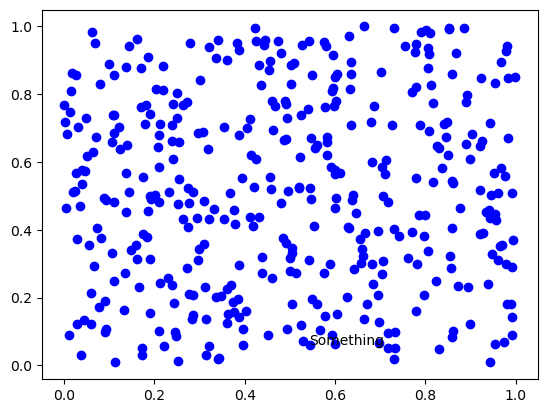

In [5]:
def plot_scatter(adjust=False):
    np.random.seed(100)
    x, y = np.random.random((2,400))

    fig, ax = plt.subplots()
    ax.plot(x, y, 'bo')

    texts = [plt.text(x[0], y[0], 'Something')]
    if adjust:
        adjust_text(texts, x=x, y=y, arrowprops=dict(arrowstyle='->', color='red'))
_ = plot_scatter()

As you can see, the label overlaps many points here and it is difficult to understand what it says. Also it is not clear which of the points it corresponds to. Let's try to asjust its location with default parameters while adding an arrow to connect it to the original point.

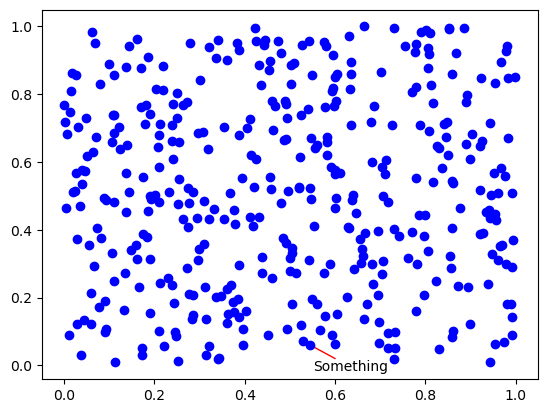

In [6]:
plot_scatter(adjust=True)

Here the number we see in the output is number of iteration the algorithm used to adjust the location of the text. The result is much better! The text doesn't overlap anything and is legible while clearly corresponding to one particular point.

#### A very simple example from http://stackoverflow.com/q/19073683/1304161, but I'll show some special tricks with it
First let's just create the data and plot it with no adjustment or anything. Then I will show how to restrict movement along one of the axes, repel text from the lina and some logic behind potential adjustment of parameters to make your plot look nicer.

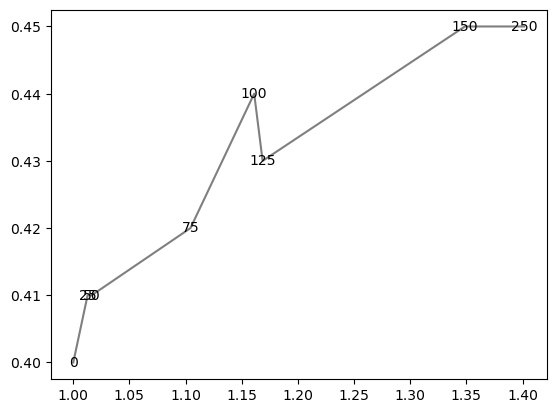

In [7]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()

text = [x for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
def plot_eucs_covers():
    plt.plot(eucs,covers,color="black", alpha=0.5)
    texts = []
    for xt, yt, s in zip(eucs, covers, text):
        texts.append(plt.text(xt, yt, s, ha='center', va='center'))
    return texts
_ = plot_eucs_covers()

Now let's just apply the text adjustment with all default parameters and define the arrow properties we like.

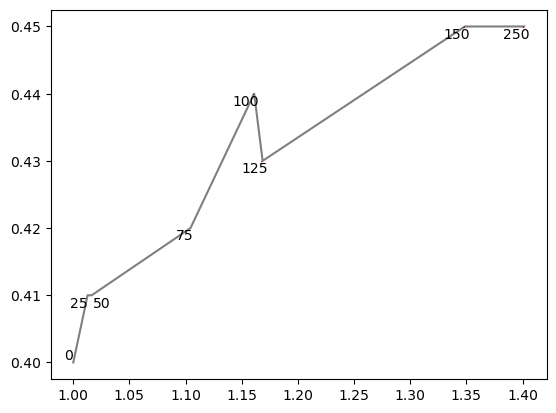

In [8]:
texts = plot_eucs_covers()
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

Now one of the labels overlays the line and two are very close to it, that's not pretty. We'll create some virtual points along the lines using linear interpolation to repel the labels from the graph itself.

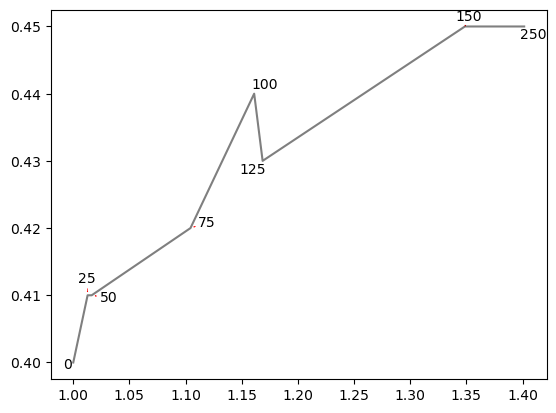

In [9]:
from scipy import interpolate
texts = plot_eucs_covers()
f = interpolate.interp1d(eucs, covers)
x = np.linspace(min(eucs), max(eucs), 300)
y = f(x)
adjust_text(texts, x=x, y=y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

Now this is quite good! Making the distance of labels to the line exactly right is difficult because of the artificial way we are repelling them and different shape of the line close to different labels.

### Now a real-world example of a volcano plot
(idea and data from http://www.gettinggeneticsdone.com/2016/01/repel-overlapping-text-labels-in-ggplot2.html)

First let's just plot the data 

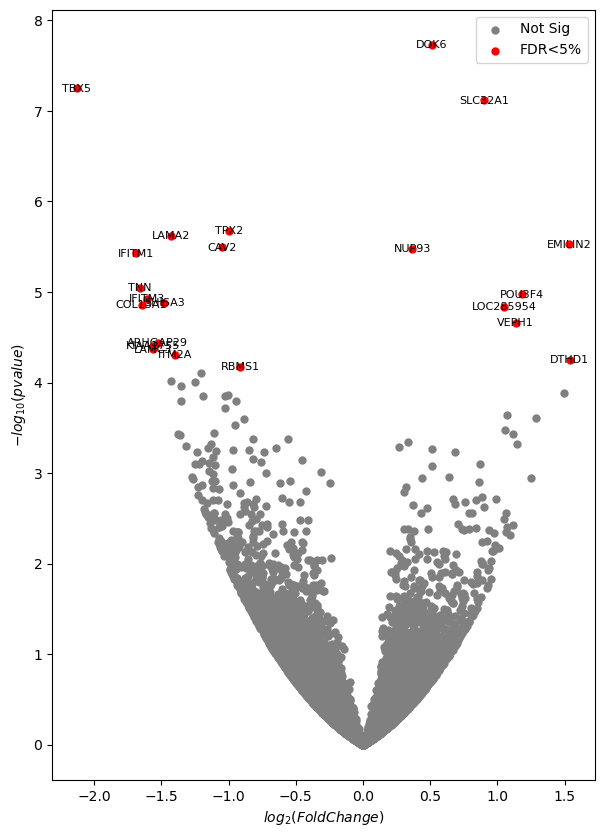

In [10]:
data = pd.read_csv('../../figures/volcano_data.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['log2FoldChange'][data['padj']>=threshold], -np.log10(data['pvalue'][data['padj']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['log2FoldChange'][data['padj']<threshold], -np.log10(data['pvalue'][data['padj']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Gene'][data['padj']<threshold]):
        texts.append(plt.text(x, y, l, size=8, ha='center', va='center'))
    plt.legend()
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs)
_ = plot_volcano()

We can't read half of the labels in the left half! Let's adjust them :)

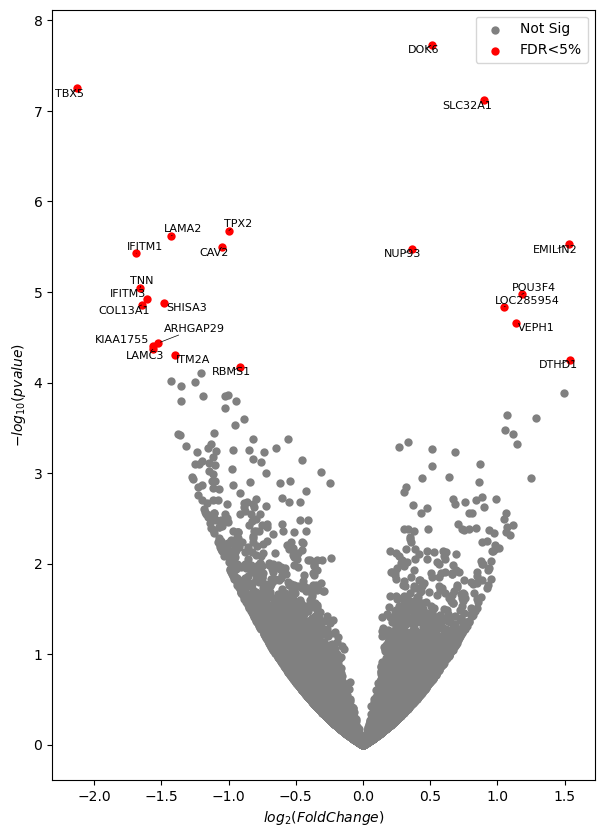

In [11]:
plot_volcano(adjust=True)

And this is very nice now!

#### Now a classical mtcars dataset; example from ggrepel package for R

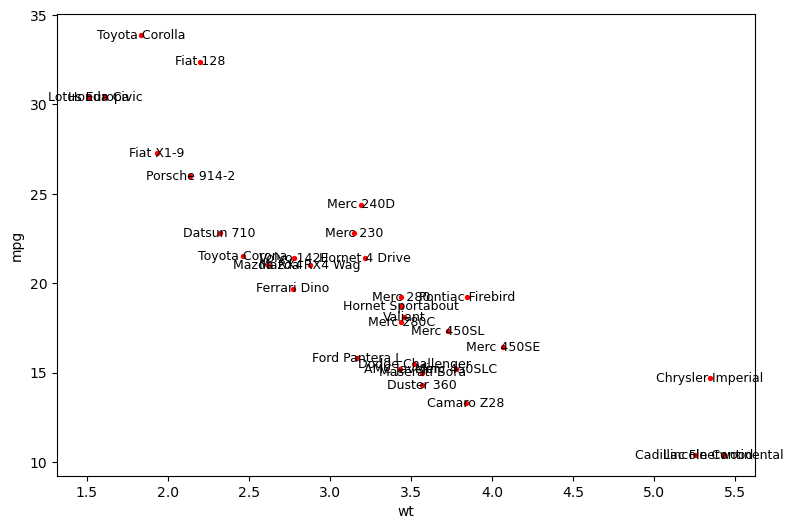

In [12]:
mtcars = pd.read_csv('../../figures/mtcars.csv')
def plot_mtcars(adjust=False, *args, **kwargs):
    plt.figure(figsize=(9, 6))
    plt.scatter(mtcars['wt'], mtcars['mpg'], s=15, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(mtcars['wt'], mtcars['mpg'], mtcars['Car']):
        texts.append(plt.text(x, y, s, size=9, ha='center', va='center'))
    plt.xlabel('wt')
    plt.ylabel('mpg')
    if adjust:
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
plot_mtcars()

Aaa everything is overlapping!!! Crazy. Let's fix it.

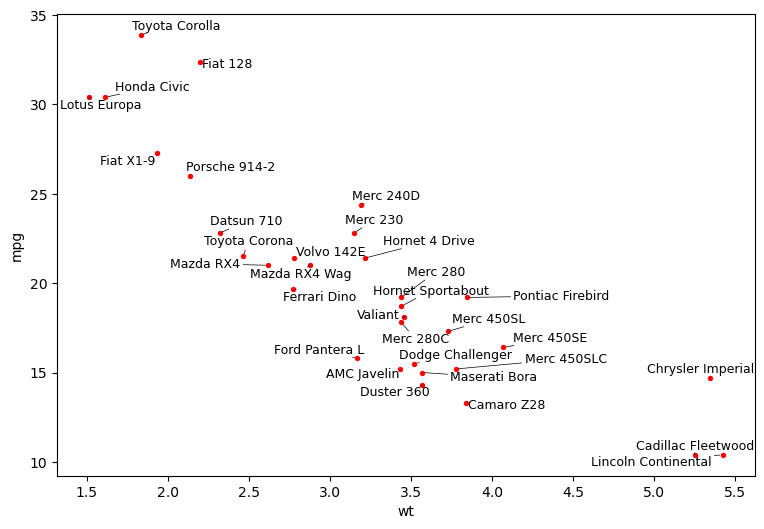

In [13]:
plot_mtcars(adjust=True)

Now this is pretty good!

Note that I specified the figure size for two latter examples. Obviously, making it larger is one of the easiest ways to reduce overlaps, but often it is limited - that's when this library can help!

### Now an example from https://blog.mafr.de/2012/03/11/time-series-data-with-matplotlib/ with adding labels

In [14]:
import matplotlib.dates as mdates
import locale
# locale.setlocale(locale.LC_ALL,'en_US.utf8') #I have it set to Russian, without this dates don't work

In [15]:
impressions = pd.read_table("../../figures/page-impressions.csv", names=['days', 'impressions'])
impressions['days'] = pd.to_datetime(impressions['days'])

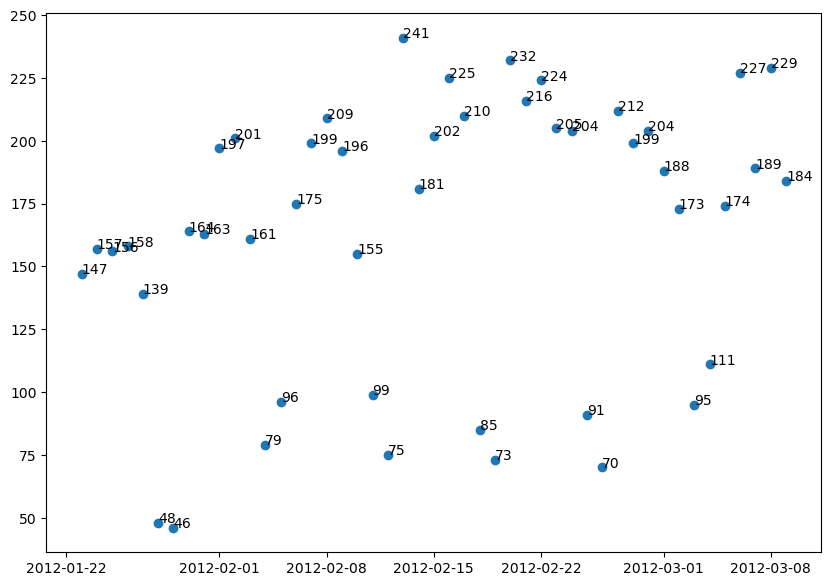

In [16]:
def plot_dates(adjust=False):
    plt.figure(figsize=(10, 7))
    plt.plot_date(x=impressions['days'], y=impressions['impressions'])
    texts = []
    for i, (x, y) in impressions.iterrows():
        texts.append(plt.text(x, y, int(y)))
    if adjust:
        adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plot_dates(adjust=False)

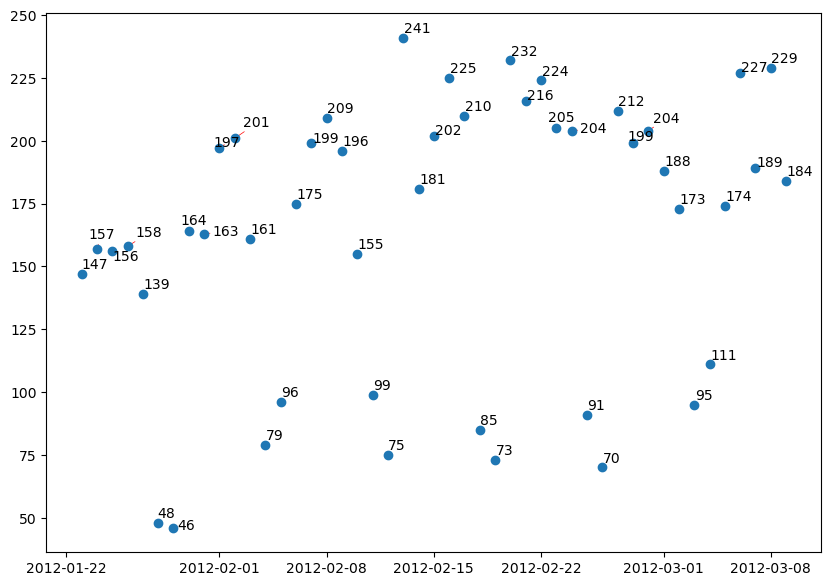

In [17]:
plot_dates(adjust=True)

### Labelling bars above them
It is possible to repel labels from any additional matplotlib objects, in this case bars, but can also be a legend, for example. Note, that the objects' bounding boxes are used, with a bounding box being the smallest rectangle contataining the object.

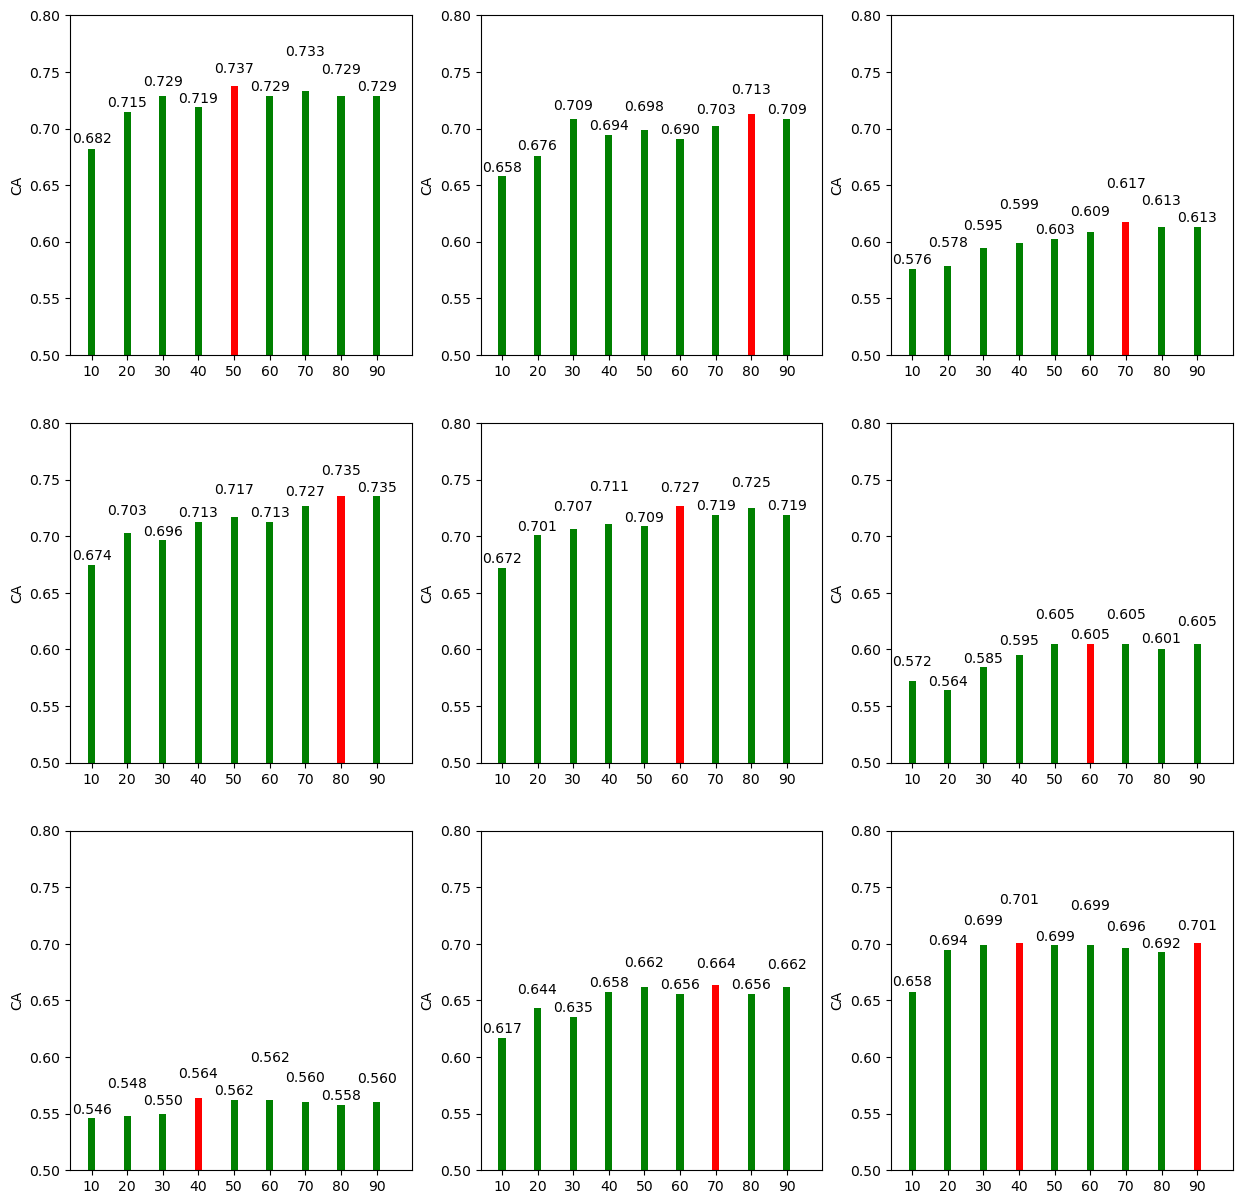

In [18]:
data = [{'rf': [[10, 0.682312925170068], [20, 0.714904143475572], [30, 0.729107400535972], [40, 0.718944547515976], [50, 0.7372706658420943], [60, 0.7291486291486291], [70, 0.7332302618016904], [80, 0.7291486291486291], [90, 0.7291486291486291]], 'besttree': 0.7372706658420943}, {'rf': [[10, 0.6576994434137291], [20, 0.6760874046588332], [30, 0.7086786229643371], [40, 0.6943929086786229], [50, 0.6984951556380127], [60, 0.6903731189445474], [70, 0.7025974025974027], [80, 0.7128014842300556], [90, 0.7086786229643373]], 'besttree': 0.7128014842300556}, {'rf': [[10, 0.5763347763347764], [20, 0.5783962069676354], [30, 0.5946402803545661], [40, 0.5988455988455988], [50, 0.6028653885796743], [60, 0.6089466089466089], [70, 0.6171098742527313], [80, 0.6130488559059988], [90, 0.6130488559059988]], 'besttree': 0.6171098742527313}, {'rf': [[10, 0.6741084312512883], [20, 0.7025767882910741], [30, 0.6964337250051535], [40, 0.7127396413110699], [50, 0.7167594310451453], [60, 0.712677798392084], [70, 0.7269635126777982], [80, 0.7351061636775922], [90, 0.7350855493712636]], 'besttree': 0.7351061636775922}, {'rf': [[10, 0.6719645433931148], [20, 0.7006184291898577], [30, 0.7066378066378066], [40, 0.7107606679035251], [50, 0.7086580086580087], [60, 0.7269841269841271], [70, 0.718841475984333], [80, 0.7249433106575964], [90, 0.7188827045969903]], 'besttree': 0.7269841269841271}, {'rf': [[10, 0.5722119150690579], [20, 0.5641723356009071], [30, 0.5845186559472274], [40, 0.5947227375798805], [50, 0.6048649762935477], [60, 0.6049062049062048], [70, 0.6048443619872191], [80, 0.6007833436404865], [90, 0.6048855905998763]], 'besttree': 0.6049062049062048}, {'rf': [[10, 0.54582560296846], [20, 0.5478664192949907], [30, 0.5499278499278499], [40, 0.564172335600907], [50, 0.5621109049680477], [60, 0.5621109049680478], [70, 0.5600700886415172], [80, 0.5580705009276438], [90, 0.5600907029478458]], 'besttree': 0.564172335600907}, {'rf': [[10, 0.6171304885590599], [20, 0.6435992578849722], [30, 0.6354566068851784], [40, 0.6577819006390435], [50, 0.6618429189857762], [60, 0.6557410843125129], [70, 0.6638425066996495], [80, 0.65578231292517], [90, 0.6618841475984334]], 'besttree': 0.6638425066996495}, {'rf': [[10, 0.6578643578643579], [20, 0.6944135229849515], [30, 0.69853638425067], [40, 0.7005565862708719], [50, 0.6985569985569986], [60, 0.6985363842506699], [70, 0.6964955679241392], [80, 0.6923933209647496], [90, 0.7005565862708719]], 'besttree': 0.7005565862708719}]

fig = plt.figure(facecolor="w",figsize=(15,15))
for i,result in enumerate(data):
# Let's plot the bars
    ax=fig.add_subplot(3,3,i+1)
    x = [item[0] for item in result['rf']]
    y = [item[1] for item in result['rf']]
    ax.axis(ymin=0.5,ymax=0.8,xmin=4,xmax=100)
    bars=ax.bar(x,y,color='green',tick_label=x,width=2)
# And add the labels, while changing the colour of some of the bars
    texts=[]
    for j,rect in enumerate(bars):
        left = rect.get_x()+1
        top = rect.get_y()+rect.get_height()
        texts.append(ax.text(left,top,'%.3f'%y[j], ha='center', va='bottom'))
        if y[j] == result['besttree']:
            rect.set_facecolor('red')
            
# Now adjust the text. We don't want to move in the x direction and we want the labels to vertically aligned with the bars.
# I also noticed that having a weaker force to repel texts from ech other makes the figure nicer.
    ax.set_ylabel('CA')
    adjust_text(texts, add_objects=bars,
                only_move='y+')

Looks nice! I guess it can be quite a common use case.

### Difficult examples

Now a couple very nice real-world plots using data from universaldependencies.org v2.2 by Kim Gerdes. This is something about the prevalence of particular syntactic structures in different languages, which are colour-coded by their language group. You can see how languages of some groups are very nicely clustered together!
It is really dense in some areas, so we increase the time limit for the algorithm to 1 second, instead of default 0.1 second. No other parameter adjustment necessary to get very decent results!

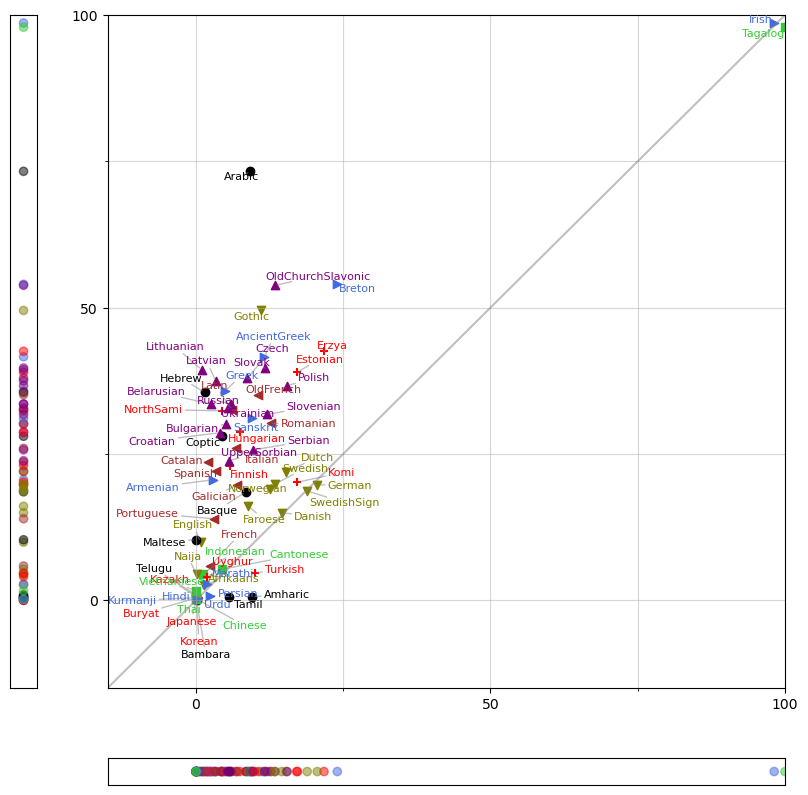

In [19]:
from matplotlib import gridspec
d1={'Afrikaans': 1.35, 'Amharic': 9.51, 'AncientGreek': 11.62, 'Arabic': 9.22, 'Armenian': 2.92, 'Bambara': 0.1, 'Basque': 8.46, 'Belarusian': 2.48, 'Breton': 24.0, 'Bulgarian': 5.12, 'Buryat': 0.0, 'Cantonese': 4.5, 'Catalan': 1.97, 'Chinese': 0.05, 'Coptic': 4.41, 'Croatian': 4.17, 'Czech': 8.74, 'Danish': 14.58, 'Dutch': 15.3, 'English': 0.79, 'Erzya': 21.74, 'Estonian': 17.1, 'Faroese': 8.92, 'Finnish': 5.82, 'French': 2.44, 'Galician': 7.0, 'German': 20.6, 'Gothic': 11.11, 'Greek': 4.88, 'Hebrew': 1.48, 'Hindi': 0.16, 'Hungarian': 7.46, 'Indonesian': 1.12, 'Irish': 98.16, 'Italian': 6.8, 'Japanese': 0.0, 'Kazakh': 0.46, 'Komi': 17.24, 'Korean': 0.04, 'Kurmanji': 0.37, 'Latin': 6.14, 'Latvian': 3.34, 'Lithuanian': 0.98, 'Maltese': 0.0, 'Marathi': 1.95, 'Naija': 0.11, 'NorthSami': 4.48, 'Norwegian': 12.59, 'OldChurchSlavonic': 13.42, 'OldFrench': 10.6, 'Persian': 2.45, 'Polish': 15.49, 'Portuguese': 3.1, 'Romanian': 12.75, 'Russian': 5.9, 'Sanskrit': 9.46, 'Serbian': 9.7, 'Slovak': 11.67, 'Slovenian': 12.08, 'Spanish': 3.41, 'Swedish': 13.36, 'SwedishSign': 18.89, 'Tagalog': 100.0, 'Tamil': 5.61, 'Telugu': 0.0, 'Thai': 0.0, 'Turkish': 9.95, 'Ukrainian': 5.39, 'UpperSorbian': 5.66, 'Urdu': 0.21, 'Uyghur': 1.96, 'Vietnamese': 0}                                                                                                                                                                
d2={'Afrikaans': 2.63, 'Amharic': 0.59, 'AncientGreek': 41.61, 'Arabic': 73.29, 'Armenian': 20.6, 'Bambara': 0.0, 'Basque': 18.53, 'Belarusian': 33.54, 'Breton': 53.99, 'Bulgarian': 30.08, 'Buryat': 0.38, 'Cantonese': 5.31, 'Catalan': 23.57, 'Chinese': 0.24, 'Coptic': 28.02, 'Croatian': 28.64, 'Czech': 37.94, 'Danish': 14.95, 'Dutch': 21.98, 'English': 9.93, 'Erzya': 42.54, 'Estonian': 38.92, 'Faroese': 16.07, 'Finnish': 23.02, 'French': 5.85, 'Galician': 19.7, 'German': 19.77, 'Gothic': 49.52, 'Greek': 35.74, 'Hebrew': 35.52, 'Hindi': 0.39, 'Hungarian': 28.8, 'Indonesian': 4.5, 'Irish': 98.64, 'Italian': 25.96, 'Japanese': 0.0, 'Kazakh': 0.44, 'Komi': 20.17, 'Korean': 0.04, 'Kurmanji': 0.46, 'Latin': 32.51, 'Latvian': 37.48, 'Lithuanian': 39.38, 'Maltese': 10.34, 'Marathi': 2.78, 'Naija': 4.44, 'NorthSami': 32.38, 'Norwegian': 19.04, 'OldChurchSlavonic': 53.81, 'OldFrench': 35.13, 'Persian': 0.73, 'Polish': 36.67, 'Portuguese': 13.93, 'Romanian': 30.23, 'Russian': 33.52, 'Sanskrit': 31.1, 'Serbian': 25.7, 'Slovak': 39.69, 'Slovenian': 31.77, 'Spanish': 22.06, 'Swedish': 19.8, 'SwedishSign': 18.69, 'Tagalog': 97.92, 'Tamil': 0.55, 'Telugu': 0.95, 'Thai': 0.15, 'Turkish': 4.67, 'Ukrainian': 32.81, 'UpperSorbian': 23.85, 'Urdu': 0.18, 'Uyghur': 4.06, 'Vietnamese': 1.62}  
langnameGroup={"AncientGreek":"Indo-European", "Arabic":"Semitic", "Basque":"isolate", "Belarusian":"Indo-European-Baltoslavic", "Bulgarian":"Indo-European-Baltoslavic", "Cantonese":"Sino-Austronesian", "Catalan":"Indo-European-Romance", "Chinese":"Sino-Austronesian", "Coptic":"Afroasiatic", "Croatian":"Indo-European-Baltoslavic", "Czech":"Indo-European-Baltoslavic", "Danish":"Indo-European-Germanic", "Dutch":"Indo-European-Germanic", "English":"Indo-European-Germanic", "Estonian":"Agglutinating", "Finnish":"Agglutinating", "French":"Indo-European-Romance", "Galician":"Indo-European-Romance", "German":"Indo-European-Germanic", "Gothic":"Indo-European-Germanic", "Greek":"Indo-European", "Hebrew":"Semitic", "Hindi":"Indo-European", "Hungarian":"Agglutinating", "Indonesian":"Sino-Austronesian", "Irish":"Indo-European", "Italian":"Indo-European-Romance", "Japanese":"Agglutinating", "Kazakh":"Agglutinating", "Korean":"Agglutinating", "Latin":"Indo-European-Romance", "Latvian":"Indo-European-Baltoslavic", "Lithuanian":"Indo-European-Baltoslavic", "Norwegian":"Indo-European-Germanic", "OldChurchSlavonic":"Indo-European-Baltoslavic", "Persian":"Indo-European", "Polish":"Indo-European-Baltoslavic", "Portuguese":"Indo-European-Romance", "Romanian":"Indo-European-Romance", "Russian":"Indo-European-Baltoslavic", "Sanskrit":"Indo-European", "Slovak":"Indo-European-Baltoslavic", "Slovenian":"Indo-European-Baltoslavic", "Spanish":"Indo-European-Romance", "Swedish":"Indo-European-Germanic", "Tamil":"Dravidian", "Turkish":"Agglutinating", "Ukrainian":"Indo-European-Baltoslavic", "Urdu":"Indo-European", "Uyghur":"Agglutinating", "Vietnamese":"Sino-Austronesian",'Afrikaans':'Indo-European-Germanic', 'SwedishSign':'Indo-European-Germanic', 'Kurmanji':'Indo-European', 'NorthSami':'Agglutinating', 'UpperSorbian':"Indo-European-Baltoslavic", 'Buryat':'Agglutinating', 'Telugu':'Dravidian', 'Serbian':"Indo-European-Baltoslavic", 'Marathi':'Indo-European','Naija':"Indo-European-Germanic", "OldFrench":"Indo-European-Romance", "Maltese":"Semitic", "Thai":"Sino-Austronesian","Amharic":"Afroasiatic", 'Erzya': 'Agglutinating', 'Faroese':"Indo-European-Germanic", 'Tagalog':"Sino-Austronesian", 'Bambara':'Niger-Congo', 'Breton':"Indo-European", 'Armenian':"Indo-European", 'Komi': 'Agglutinating'}
groupColors={"Indo-European-Romance":'brown',"Indo-European-Baltoslavic":'purple',"Indo-European-Germanic":'olive',"Indo-European":'royalBlue',"Sino-Austronesian":'limeGreen', "Agglutinating":'red'}
groupMarkers={"Indo-European-Romance":'<',"Indo-European-Baltoslavic":'^',"Indo-European-Germanic":'v',"Indo-European":'>',"Sino-Austronesian":'s', "Agglutinating":'+'}

col1 = pd.Series(d1)
col2 = pd.Series(d2)

c=[groupColors.get(langnameGroup[label],'k') for label in col1.index]
m=[groupMarkers.get(langnameGroup[label],'o') for label in col1.index]

fig = plt.figure(figsize=(10,10)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 25], height_ratios=[25, 1]) 
aa = plt.subplot(gs[0])
ax = plt.subplot(gs[1])
bb = plt.subplot(gs[3])
li,la = (-15,100)
plt.xlim(li,la)
plt.ylim(li,la)
ax.set_xlim([li,la])
ax.set_ylim([li,la])
aa.set_xlim([0, 1])
aa.set_ylim([li,la])
bb.set_ylim([0, 1])
ax.set_xticks([0, 50,100], minor=False) # only the 50% is major
ax.set_xticks([0,25,50,75,100], minor=True) # all 10th are minor
ax.set_yticks([0, 50,100], minor=False) # only the 50% is major
ax.set_yticks([0,25,50,75,100], minor=True) # all 10th are minor
ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.plot([0, 1], [0, 1], transform=ax.transAxes, alpha=.5, color="gray") # diagonal
aa.set_xticks([], minor=False) 
aa.set_yticks([], minor=False)
bb.set_xticks([], minor=False) 
bb.set_yticks([], minor=False)	

for xx, yy, cc, mm in zip(col1, col2, c, m):
    ax.scatter(xx, yy, marker=mm, c=cc)
aa.scatter([0.5 for _ in col1], col2, c=c, alpha=0.5)
bb.scatter(col1, [0.5 for _ in col2], c=c, alpha=0.5)

texts=[]
for label, x, y in zip(col1.index, col1, col2):
    texts+=[ax.text(x, y, label, color=groupColors.get(langnameGroup[label],'k'),
                    fontsize=8, ha='center', va='center')] # for adjustText

adjust_text(texts, ax=ax, time_lim=1,
            arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

We can also look at distribution of languages across just one of these features, and we can use adjust_text to nicely arrange the labels along one axis.

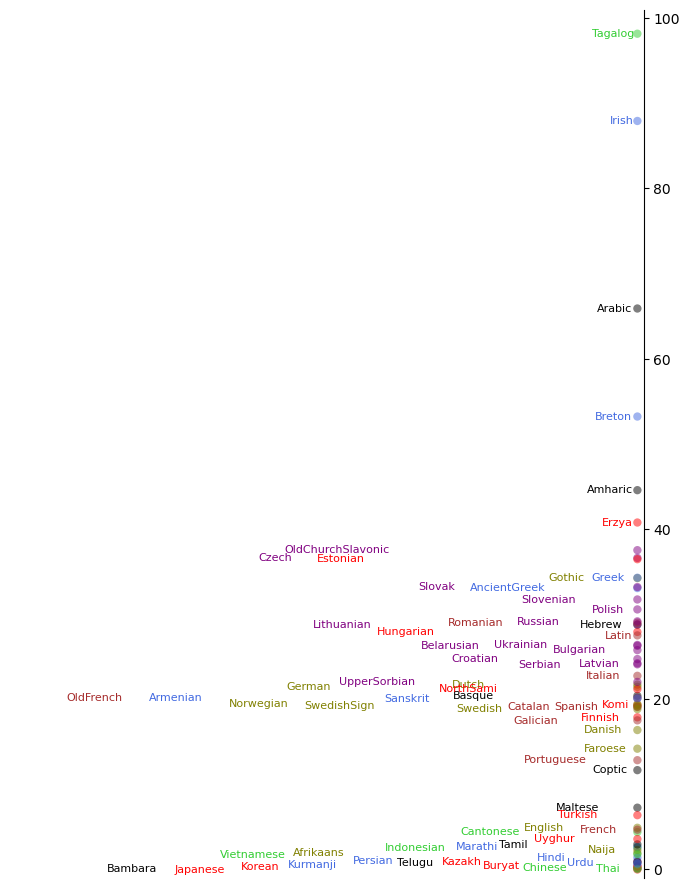

In [20]:
from matplotlib import patches
d={'Afrikaans': 1.93, 'Amharic': 44.56, 'AncientGreek': 33.06, 'Arabic': 65.9, 'Armenian': 20.16,
'Bambara': 0.13, 'Basque': 20.4, 'Belarusian': 26.28, 'Breton': 53.21, 'Bulgarian': 25.77, 'Buryat': 0.4,
'Cantonese': 4.4, 'Catalan': 19.14, 'Chinese': 0.19, 'Coptic': 11.67, 'Croatian': 24.72, 'Czech': 36.6,
'Danish': 16.38, 'Dutch': 21.72, 'English': 4.9, 'Erzya': 40.76, 'Estonian': 36.45,
'Faroese': 14.19, 'Finnish': 17.88, 'French': 4.67,
'Galician': 17.52, 'German': 21.45, 'Gothic': 34.23, 'Greek': 34.27,
'Hebrew': 28.75, 'Hindi': 1.4, 'Hungarian': 27.91, 'Indonesian': 2.6,
'Irish': 87.93, 'Italian': 22.75, 'Japanese': 0.0, 'Kazakh': 0.89, 'Komi': 19.34, 'Korean': 0.35, 'Kurmanji': 0.61,
'Latin': 27.5, 'Latvian': 24.22, 'Lithuanian': 28.8, 'Maltese': 7.26, 'Marathi': 2.64,
'Naija': 2.29, 'NorthSami': 21.18, 'Norwegian': 19.43, 'OldChurchSlavonic': 37.51, 'OldFrench': 20.14,
'Persian': 0.99, 'Polish': 30.55, 'Portuguese': 12.84, 'Romanian': 29.0, 'Russian': 29.15,
'Sanskrit': 20.09, 'Serbian': 24.1, 'Slovak': 33.18, 'Slovenian': 31.72, 'Spanish': 19.09, 'Swedish': 18.84, 'SwedishSign': 19.23,
'Tagalog': 98.18, 'Tamil': 2.95, 'Telugu': 0.85, 'Thai': 0.06, 'Turkish': 6.38,
'Ukrainian': 26.38, 'UpperSorbian': 22.03, 'Urdu': 0.74, 'Uyghur': 3.58, 'Vietnamese': 1.78}
langnameGroup={"AncientGreek":"Indo-European", "Arabic":"Semitic", "Basque":"isolate", "Belarusian":"Indo-European-Baltoslavic", "Bulgarian":"Indo-European-Baltoslavic", "Cantonese":"Sino-Austronesian", "Catalan":"Indo-European-Romance", "Chinese":"Sino-Austronesian", "Coptic":"Afroasiatic", "Croatian":"Indo-European-Baltoslavic", "Czech":"Indo-European-Baltoslavic", "Danish":"Indo-European-Germanic", "Dutch":"Indo-European-Germanic", "English":"Indo-European-Germanic", "Estonian":"Agglutinating", "Finnish":"Agglutinating", "French":"Indo-European-Romance", "Galician":"Indo-European-Romance", "German":"Indo-European-Germanic", "Gothic":"Indo-European-Germanic", "Greek":"Indo-European", "Hebrew":"Semitic", "Hindi":"Indo-European", "Hungarian":"Agglutinating", "Indonesian":"Sino-Austronesian", "Irish":"Indo-European", "Italian":"Indo-European-Romance", "Japanese":"Agglutinating", "Kazakh":"Agglutinating", "Korean":"Agglutinating", "Latin":"Indo-European-Romance", "Latvian":"Indo-European-Baltoslavic", "Lithuanian":"Indo-European-Baltoslavic", "Norwegian":"Indo-European-Germanic", "OldChurchSlavonic":"Indo-European-Baltoslavic", "Persian":"Indo-European", "Polish":"Indo-European-Baltoslavic", "Portuguese":"Indo-European-Romance", "Romanian":"Indo-European-Romance", "Russian":"Indo-European-Baltoslavic", "Sanskrit":"Indo-European", "Slovak":"Indo-European-Baltoslavic", "Slovenian":"Indo-European-Baltoslavic", "Spanish":"Indo-European-Romance", "Swedish":"Indo-European-Germanic", "Tamil":"Dravidian", "Turkish":"Agglutinating", "Ukrainian":"Indo-European-Baltoslavic", "Urdu":"Indo-European", "Uyghur":"Agglutinating", "Vietnamese":"Sino-Austronesian",'Afrikaans':'Indo-European-Germanic', 'SwedishSign':'Indo-European-Germanic', 'Kurmanji':'Indo-European', 'NorthSami':'Agglutinating', 'UpperSorbian':"Indo-European-Baltoslavic", 'Buryat':'Agglutinating', 'Telugu':'Dravidian', 'Serbian':"Indo-European-Baltoslavic", 'Marathi':'Indo-European','Naija':"Indo-European-Germanic", "OldFrench":"Indo-European-Romance", "Maltese":"Semitic", "Thai":"Sino-Austronesian","Amharic":"Afroasiatic", 'Erzya': 'Agglutinating', 'Faroese':"Indo-European-Germanic", 'Tagalog':"Sino-Austronesian", 'Bambara':'Niger-Congo', 'Breton':"Indo-European", 'Armenian':"Indo-European", 'Komi': 'Agglutinating'}
groupColors={"Indo-European-Romance":'brown',"Indo-European-Baltoslavic":'purple',"Indo-European-Germanic":'olive',"Indo-European":'royalBlue',"Sino-Austronesian":'limeGreen', "Agglutinating":'red'}
df = pd.Series(d)
c=[groupColors.get(langnameGroup[label],'k') for label in df.index]
fig, aa = plt.subplots(figsize=(7, 9))
aa.axes.get_xaxis().set_visible(False)
aa.set_xlim(-10, 0.1)
aa.set_ylim(-1, 101)
aa.scatter([0 for _ in df], df, c=c, alpha=0.5, edgecolors='none') 
aa.spines['left'].set_visible(False)
aa.spines['top'].set_visible(False)
aa.spines['bottom'].set_visible(False)
aa.yaxis.set_label_position('right') 
aa.yaxis.set_ticks_position('right')
plt.tight_layout()

texts=[]
np.random.seed(1)
for label, y in zip(df.index, df):
    texts+=[aa.text(-.1+np.random.random()/10, y, label, # A small random shift prevents labels which have exactly the same coordinates from being stuck together
                                                        #    (not a problem in this example really, but wanted to mention this possibility)
                    color=groupColors.get(langnameGroup[label],'k'), fontsize=8,
                    ha='right', va='center')]
adjust_text(texts, x=[0 for _ in df], y=df, avoid_self=False,
            force_text=(0.5, 0),# Since the movements are so contrained, high force speeds up the process a lot
            expand=(1, 1), # We want them to be quite compact, so reducing expansion makes sense
            only_move='x-', #Only allow movement to the left
)              

### adjust_text also works with cartopy axes!

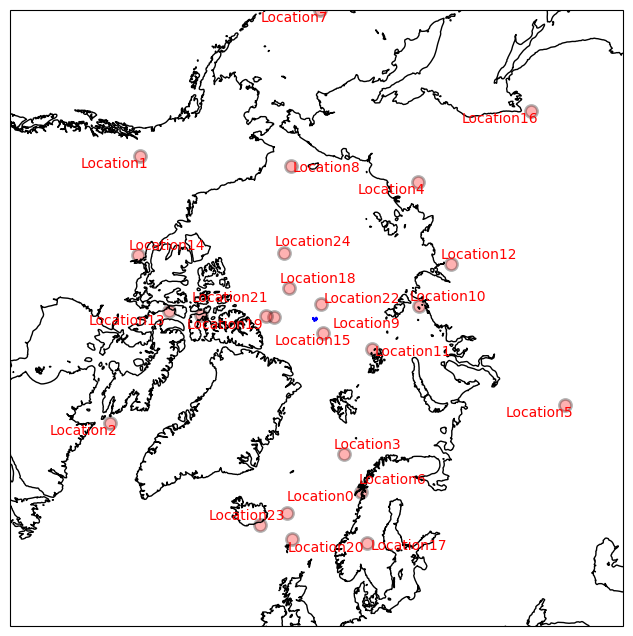

In [21]:
import cartopy.crs as ccrs
fig = plt.figure(figsize=[10, 8])
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines(resolution='50m')
ax.set_extent([-180,180,53,90],crs=ccrs.PlateCarree())
np.random.seed(0)
loclon = np.random.randint(-180, 180, 25)
loclat = np.random.randint(53, 90, 25)
ax.scatter(loclon, loclat,s=75,
     linewidth=2,  marker='o',alpha=0.3,edgecolors='black',c='red',
     transform=ccrs.PlateCarree() )
texts = [ax.text(loclon[i], loclat[i], 'Location%s' %i, ha='center', color='r',
            va='center',transform=ccrs.PlateCarree()) for i in range(len(loclon))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue'), ax=ax)

Thanks for getting to the end, feel free to contribure more examples or let me know what you think!